# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

citi_id = []
citi = []
cloudi = []
country_name = []
humid_temp = []
lat_coord = []
lng_coord = []
top_temp = []
wind_speed_measure = []

for city in cities:
    
    response = requests.get(query_url + city).json()
    
    try:
        
        #citi_id.append(response['id'])
        
        #citi.append(response['name'])
        
        city_id = response['id']
        citi_id.append(city_id)
        
        city_detail = response['name']
        citi.append(city_detail)
        
        cloud = response['clouds']['all']
        cloudi.append(cloud)
        
        country = response['sys']['country']
        country_name.append(country)
        
        temperature_look = response['main']['temp']
        top_temp.append(temperature_look)
        
        humid = response['main']['humidity']
        humid_temp.append(humid)
        
        lat = response['coord']['lat']
        lat_coord.append(lat)
        
        lng = response['coord']['lon']
        lng_coord.append(lng)
        
        wind_speed = response['wind']['speed']
        wind_speed_measure.append(wind_speed)
        
        print(f"City Name: {city}, City ID: {city_id}")
     
    except:
        
        print("This information is not found, Skipping to found information")
        
        
    

City Name: ulety, City ID: 2014369
City Name: manokwari, City ID: 1636308
City Name: punta arenas, City ID: 3874787
City Name: avarua, City ID: 4035715
City Name: albany, City ID: 5106841
City Name: busselton, City ID: 2075265
City Name: coahuayana, City ID: 4013679
City Name: bethel, City ID: 5282297
City Name: saskylakh, City ID: 2017155
City Name: puerto ayora, City ID: 3652764
City Name: baracoa, City ID: 3567834
This information is not found, Skipping to found information
City Name: kaniama, City ID: 214389
City Name: bluff, City ID: 2206939
City Name: hobart, City ID: 2163355
City Name: skalat, City ID: 693700
City Name: arraial do cabo, City ID: 3471451
City Name: tres palos, City ID: 3981069
City Name: zhigansk, City ID: 2012530
City Name: georgetown, City ID: 1735106
City Name: kahului, City ID: 5847411
City Name: iskateley, City ID: 866062
City Name: victoria, City ID: 1819729
This information is not found, Skipping to found information
City Name: sitka, City ID: 5557293
City

City Name: margate, City ID: 2643044
City Name: christchurch, City ID: 2192362
City Name: soe, City ID: 1626703
This information is not found, Skipping to found information
City Name: dunkwa, City ID: 2301400
City Name: pangnirtung, City ID: 6096551
City Name: prince rupert, City ID: 6113406
This information is not found, Skipping to found information
City Name: longyearbyen, City ID: 2729907
City Name: port-gentil, City ID: 2396518
City Name: laibin, City ID: 1804609
City Name: smalininkai, City ID: 598655
City Name: krasnoselkup, City ID: 1502073
City Name: lagoa, City ID: 3372964
City Name: saldanha, City ID: 3361934
City Name: poum, City ID: 2138555
City Name: grindavik, City ID: 3416888
City Name: vardo, City ID: 777019
City Name: carnarvon, City ID: 2074865
City Name: praia da vitoria, City ID: 3372760
City Name: lamu, City ID: 189741
City Name: pangai, City ID: 4032369
City Name: sioux lookout, City ID: 6148373
City Name: mariental, City ID: 3355595
City Name: tuktoyaktuk, City 

City Name: biloela, City ID: 2175819
City Name: chicama, City ID: 3698359
City Name: carnot, City ID: 2387495
This information is not found, Skipping to found information
City Name: luorong, City ID: 1801850
City Name: providencia, City ID: 3991622
City Name: moussoro, City ID: 2427336
City Name: bowen, City ID: 2174444
City Name: bilibino, City ID: 2126682
This information is not found, Skipping to found information
City Name: palmer, City ID: 4946620
City Name: fairbanks, City ID: 5861897
City Name: comodoro rivadavia, City ID: 3860443
City Name: durazno, City ID: 3442727
City Name: cayenne, City ID: 3382160
City Name: emirdag, City ID: 315621
City Name: uaua, City ID: 3385883
City Name: seminole, City ID: 4172445
City Name: pacific grove, City ID: 5380437
City Name: ordzhonikidze, City ID: 1520381
City Name: batemans bay, City ID: 2176639
City Name: ketchikan, City ID: 5554428
City Name: kamenskiy, City ID: 553416
City Name: ardakan, City ID: 143073
City Name: sagua la grande, City 

City Name: paita, City ID: 3694112
City Name: vagay, City ID: 1487860
City Name: syracuse, City ID: 2523082
City Name: nhamunda, City ID: 3393929
City Name: matara, City ID: 1235846
City Name: sao felix do xingu, City ID: 3388847
City Name: tezu, City ID: 1254709
City Name: mezen, City ID: 527321
City Name: los algarrobos, City ID: 3705562
City Name: tobolsk, City ID: 1489530
City Name: ranong, City ID: 1150965
City Name: rodos, City ID: 400666
City Name: naze, City ID: 1855540
City Name: gat, City ID: 293842
City Name: eyl, City ID: 60019


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#citi_weather_dict = ({"City ID": citi_id, "City": citi, 
                     #"Clouds": cloudi, "Country": country_name, 
                     #"Humidity": humid_temp, "Lat": lat_coord, "Lng": lng_coord, 
                     #"Temperature": top_temp, "Wind Speed": wind_speed_measure
                     #})

#citi_weather_dict


citi_weather_df = pd.DataFrame({"City ID": citi_id, "City": citi, "Cloudiness": cloudi, 
                                "Country": country_name, "Humidity": humid_temp, "Lat": lat_coord,
                               "Lng": lng_coord, "Temperature": top_temp, "Wind Speed": wind_speed_measure})

citi_weather_df

,City ID,City,Cloudiness,Country,Humidity,Lat,Lng,Temperature,Wind Speed
0,2014369,Ulety,10,RU,86,51.3572,112.4849,13.56,1.92
1,1636308,Manokwari,99,ID,72,-0.8667,134.0833,26.50,3.13
2,3874787,Punta Arenas,75,CL,61,-53.1500,-70.9167,7.96,10.80
3,4035715,Avarua,75,CK,83,-21.2078,-159.7750,24.03,6.17
4,5106841,Albany,14,US,54,42.6001,-73.9662,24.46,0.45
...,...,...,...,...,...,...,...,...,...
584,1150965,Ranong,98,TH,89,9.9658,98.6348,26.53,4.39
585,400666,Rhodes,0,GR,81,36.4408,28.2225,26.55,8.75
586,1855540,Naze,100,JP,87,28.3667,129.4833,26.51,11.86
587,293842,Kiryat Gat,0,IL,100,31.6100,34.7642,27.72,2.68


In [6]:
citi_weather_df.to_csv("output_data/cities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
citi_weather_df["Humidity"]>100

0      False
1      False
2      False
3      False
4      False
       ...  
584    False
585    False
586    False
587    False
588    False
Name: Humidity, Length: 589, dtype: bool

In [21]:
#  Get the indices of cities that have humidity over 100%.

citi_weather_df.loc[citi_weather_df["Humidity"]>100]

,City ID,City,Cloudiness,Country,Humidity,Lat,Lng,Temperature,Wind Speed


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

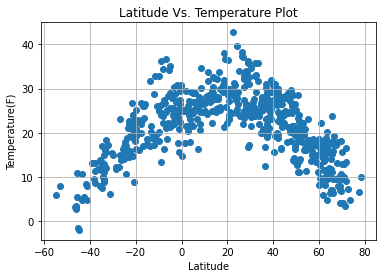

In [26]:
#Latitude Vs. Temperature plot shows the relationship between Latitude and Temperature.
  #I noticed the further away from the equator, the more temperatures drop. 
    #There's a strong relationship in this plot.

x_values = citi_weather_df["Lat"]
y_values = citi_weather_df["Temperature"]

plt.scatter(x_values,y_values)
plt.grid(visible=True)
plt.title("Latitude Vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.savefig("Images/Lat_V_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

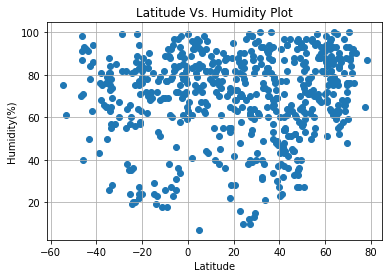

In [25]:
#Latitude Vs. Humidity plot shows the relationship between Latitude and Humidity.
 #There's no correlation for this plot.
x_values = citi_weather_df["Lat"]
y_values = citi_weather_df["Humidity"]
plt.grid(visible=True)
plt.scatter(x_values,y_values)
plt.title("Latitude Vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("Images/Lat_V_Humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

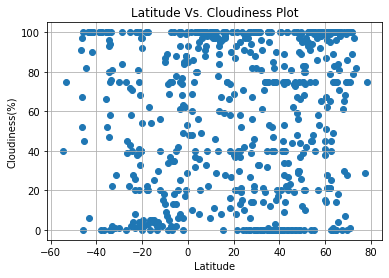

In [27]:
#Latitude Vs. Cloudiness plot shows the relationship between Latitude and Cloudiness.
 #There's no correlation for this plot.

x_values = citi_weather_df["Lat"]
y_values = citi_weather_df["Cloudiness"]
plt.grid(visible=True)
plt.scatter(x_values,y_values)
plt.title("Latitude Vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("Images/Lat_V_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

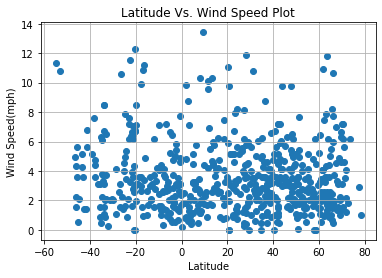

In [29]:
#Latitude Vs. Cloudiness plot shows the relationship between Latitude and Cloudiness.
 #In this plot I noticed, north of the equator is where the wind speeds pick up.
x_values = citi_weather_df["Lat"]
y_values = citi_weather_df["Wind Speed"]
plt.grid(visible=True)
plt.scatter(x_values,y_values)
plt.title("Latitude Vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.savefig("Images/Lat_V_Wind Speed.png")
plt.show()

## Linear Regression

In [ ]:
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)  

regress_value = x_values * slope + intercept



0.8176158563762919


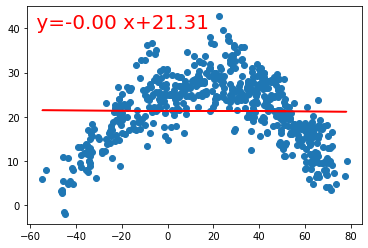

In [40]:
(slope, intercept, rvalue, pvalue, stderr)= linregress(citi_weather_df["Lat"],citi_weather_df["Temperature"])  

regress_value = citi_weather_df["Lat"] * slope + intercept

plt.scatter(citi_weather_df["Lat"],citi_weather_df["Temperature"])

plt.plot(citi_weather_df["Lat"],regress_value, color="red")
plt.annotate(f" y={slope:.2f} x+{intercept:.2f}",(-60,40), fontsize=20,color="red")
print(pvalue)
plt.show()

In [41]:
Northern_df = citi_weather_df.loc[citi_weather_df["Lat"]>=0]

Northern_df

,City ID,City,Cloudiness,Country,Humidity,Lat,Lng,Temperature,Wind Speed
0,2014369,Ulety,10,RU,86,51.3572,112.4849,13.56,1.92
4,5106841,Albany,14,US,54,42.6001,-73.9662,24.46,0.45
6,4013679,Coahuayana Viejo,90,MX,55,18.7333,-103.6833,31.97,1.71
7,5282297,Bethel,75,US,46,41.3712,-73.4140,28.45,3.60
8,2017155,Saskylakh,100,RU,90,71.9167,114.0833,16.56,4.04
...,...,...,...,...,...,...,...,...,...
584,1150965,Ranong,98,TH,89,9.9658,98.6348,26.53,4.39
585,400666,Rhodes,0,GR,81,36.4408,28.2225,26.55,8.75
586,1855540,Naze,100,JP,87,28.3667,129.4833,26.51,11.86
587,293842,Kiryat Gat,0,IL,100,31.6100,34.7642,27.72,2.68


In [42]:
Southern_df = citi_weather_df.loc[citi_weather_df["Lat"]<0]

Southern_df

,City ID,City,Cloudiness,Country,Humidity,Lat,Lng,Temperature,Wind Speed
1,1636308,Manokwari,99,ID,72,-0.8667,134.0833,26.50,3.13
2,3874787,Punta Arenas,75,CL,61,-53.1500,-70.9167,7.96,10.80
3,4035715,Avarua,75,CK,83,-21.2078,-159.7750,24.03,6.17
5,2075265,Busselton,100,AU,65,-33.6500,115.3333,11.98,2.09
9,3652764,Puerto Ayora,88,EC,84,-0.7393,-90.3518,22.53,3.13
...,...,...,...,...,...,...,...,...,...
556,3355672,Lüderitz,45,NA,64,-26.6481,15.1594,13.90,10.57
570,3933104,Pangoa,56,PE,51,-12.1167,-73.0000,28.73,1.54
574,3694112,Paita,2,PE,72,-5.0892,-81.1144,21.39,6.68
577,3393929,Nhamundá,49,BR,61,-2.1861,-56.7131,30.70,1.44


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

2.5261809084937724e-60


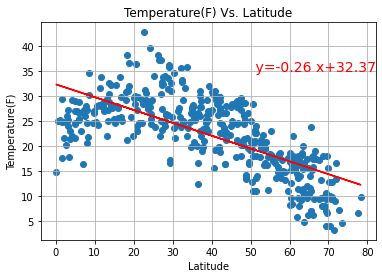

In [61]:
# Northern_df = citi_weather_df.loc[citi_weather_df["Lat"]>=0]

# Northern_df

x_values = Northern_df["Lat"]
y_values = Northern_df["Temperature"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)  

regress_value = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title("Temperature(F) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.grid(visible=True)
plt.plot(x_values,regress_value, color="red")
plt.annotate(f" y={slope:.2f} x+{intercept:.2f}",(50,35), fontsize=14,color="red")
print(pvalue)
plt.savefig("Images/Lat_V_Temp_N.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

7.312193205752074e-47


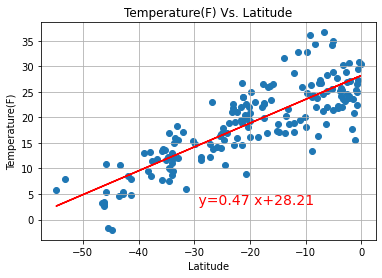

In [67]:

x_values = Southern_df["Lat"]
y_values = Southern_df["Temperature"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)  

regress_value = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title("Temperature(F) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.grid(visible=True)
plt.plot(x_values,regress_value, color="red")
plt.annotate(f" y={slope:.2f} x+{intercept:.2f}",(-30,3), fontsize=14,color="red")
print(pvalue)
plt.savefig("Images/Lat_V_Temp_S.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.12083836162252164


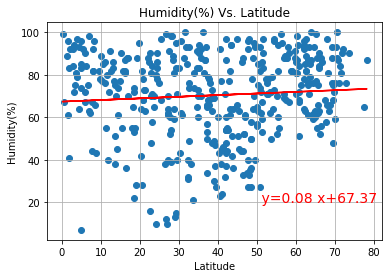

In [64]:
x_values = Northern_df["Lat"]
y_values = Northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)  

regress_value = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title("Humidity(%) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(visible=True)
plt.plot(x_values,regress_value, color="red")
plt.annotate(f" y={slope:.2f} x+{intercept:.2f}",(50,20), fontsize=14,color="red")
print(pvalue)
plt.savefig("Images/Lat_V_Humid_N.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.8275446498021221


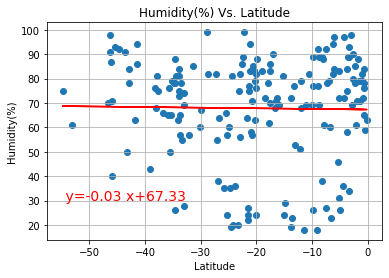

In [70]:
x_values = Southern_df["Lat"]
y_values = Southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)  

regress_value = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title("Humidity(%) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(visible=True)
plt.plot(x_values,regress_value, color="red")
plt.annotate(f" y={slope:.2f} x+{intercept:.2f}",(-55,30), fontsize=14,color="red")
print(pvalue)
plt.savefig("Images/Lat_V_Humid_S.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.5384553696796792


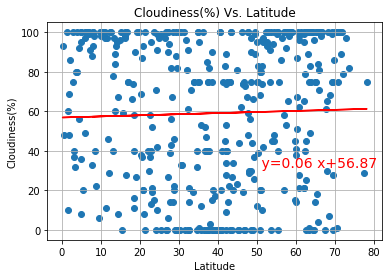

In [62]:
x_values = Northern_df["Lat"]
y_values = Northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)  

regress_value = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title("Cloudiness(%) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(visible=True)
plt.plot(x_values,regress_value, color="red")
plt.annotate(f" y={slope:.2f} x+{intercept:.2f}",(50,32), fontsize=14,color="red")
print(pvalue)
plt.savefig("Images/Lat_V_Cloud_N.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.03443762897527489


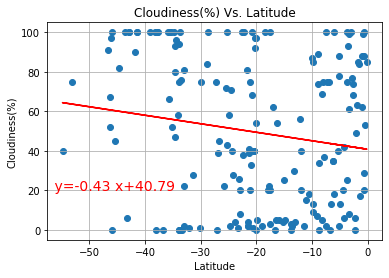

In [74]:
x_values = Southern_df["Lat"]
y_values = Southern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)  

regress_value = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title("Cloudiness(%) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(visible=True)
plt.plot(x_values,regress_value, color="red")
plt.annotate(f" y={slope:.2f} x+{intercept:.2f}",(-57,20), fontsize=14,color="red")
print(pvalue)
plt.savefig("Images/Lat_V_Cloud_S.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.7065494022100337


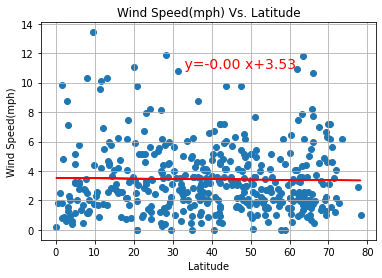

In [63]:
x_values = Northern_df["Lat"]
y_values = Northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)  

regress_value = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title("Wind Speed(mph) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(visible=True)
plt.plot(x_values,regress_value, color="red")
plt.annotate(f" y={slope:.2f} x+{intercept:.2f}",(32,11), fontsize=14,color="red")
print(pvalue)
plt.savefig("Images/Lat_V_Wind_N.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.020872991749796847


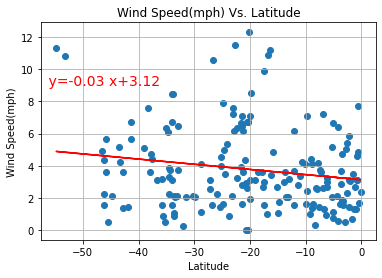

In [77]:
x_values = Southern_df["Lat"]
y_values = Southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)  

regress_value = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title("Wind Speed(mph) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(visible=True)
plt.plot(x_values,regress_value, color="red")
plt.annotate(f" y={slope:.2f} x+{intercept:.2f}",(-57,9), fontsize=14,color="red")
print(pvalue)
plt.savefig("Images/Lat_V_Wind_S.png")
plt.show()